# Linear Regression


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(108)

## Data Set

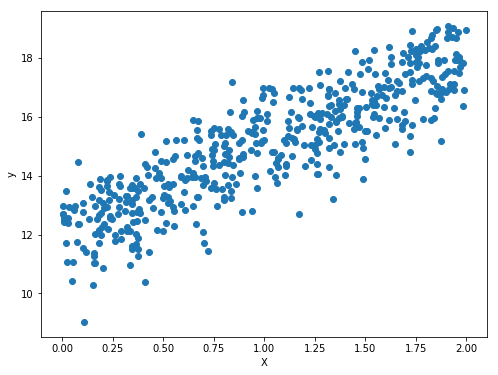

In [7]:
X = 2 * np.random.rand(500, 1)
y = 12 + 3 * X + np.random.randn(500, 1)

fig = plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [11]:
# Split Data
X_train, X_test,y_train,y_test = train_test_split(X,y)
print(f'Shape X_train : {X_train.shape}')
print(f'Shape X_test : {X_test.shape}')
print(f'Shape y_train : {y_train.shape}')
print(f'Shape y_test : {X_test.shape}')

Shape X_train : (375, 1)
Shape X_test : (125, 1)
Shape y_train : (375, 1)
Shape y_test : (125, 1)


## Linear Regression Class 

In [21]:
class LinearRegression:
    def __init__(self):
        pass
    def train_gradient_decent(self, X, y, learning_rate=0.1, n_iters=100):
    
        #Initialize the parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(shape=(n_features,1))
        self.bias = 0
        costs = []

        for i in range(n_iters):
            # Linear combination 
            y_predict = np.dot(X, self.weights) + self.bias
            # Compute cost 
            cost = (1/n_samples) * np.sum((y_predict - y)**2)
            costs.append(cost)

            if i % 100 == 0:
                print(f'Cost at itteration {i} : {cost}')

            # Compute Gradients 
            dJ_dw = (2 / n_samples) * np.dot(X.T, (y_predict - y))
            dJ_db = (2 / n_samples) * np.sum((y_predict - y))

            # Update weights and bias 
            self.weights = self.weights - learning_rate * dJ_dw
            self.bias = self.bias - learning_rate * dJ_db

        return self.weights, self.bias, costs

    def train_normal_equation(self, X, y):
        self.weights = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        self.bias = 0
        
        return self.weights, self.bias
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
        
        

## Training with Gradient Descent

Cost at itteration 0 : 232.87215385593248
Cost at itteration 100 : 9.238594677800004
Cost at itteration 200 : 5.451586472042578
Cost at itteration 300 : 4.286615033459931
Cost at itteration 400 : 3.435041628346316
Cost at itteration 500 : 2.800392977062267
Cost at itteration 600 : 2.327284710393811
Cost at itteration 700 : 1.9745978384197271
Cost at itteration 800 : 1.7116811983727636
Cost at itteration 900 : 1.5156853585684171


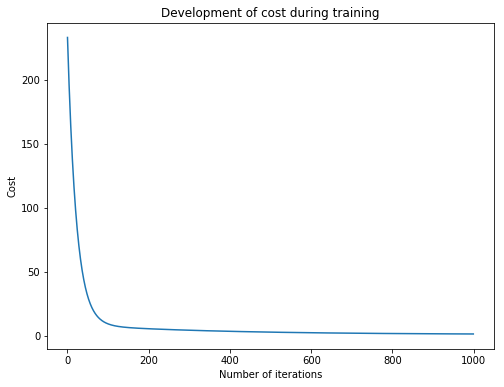

In [26]:
regressor = LinearRegression()
w_trained, b_trained, costs = regressor.train_gradient_decent(X_train, y_train, learning_rate=0.005, n_iters=1000)

fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(1000), costs)
plt.title("Development of cost during training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

## Testing


In [27]:
n_samples, _ = X_train.shape
n_samples_test, _ = X_test.shape

y_p_train = regressor.predict(X_train)
y_p_test = regressor.predict(X_test)

error_train =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print(f"Error on training set: {np.round(error_train, 4)}")
print(f"Error on test set: {np.round(error_test)}")

Error on training set: 1.3696
Error on test set: 1.0


## Training with normal equation

In [28]:
# To compute the parameters using the normal equation, we add a bias value of 1 to each input example
X_b_train = np.c_[np.ones((n_samples)), X_train]
X_b_test = np.c_[np.ones((n_samples_test)), X_test]

reg_normal = LinearRegression()
w_trained = reg_normal.train_normal_equation(X_b_train, y_train)


## Testing

In [29]:
y_p_train = reg_normal.predict(X_b_train)
y_p_test = reg_normal.predict(X_b_test)

error_train =  (1 / n_samples) * np.sum((y_p_train - y_train) ** 2)
error_test =  (1 / n_samples_test) * np.sum((y_p_test - y_test) ** 2)

print(f"Error on training set: {np.round(error_train, 4)}")
print(f"Error on test set: {np.round(error_test, 4)}")

Error on training set: 0.9417
Error on test set: 0.9758


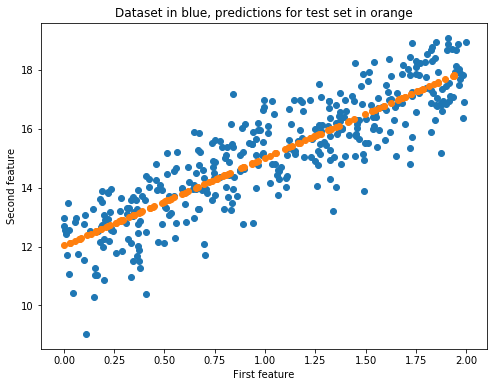

In [30]:
# Plot the test predictions

fig = plt.figure(figsize=(8,6))
plt.title("Dataset in blue, predictions for test set in orange")
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_p_test)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()
